# Introduction
This notebook derives the 1-D equations used for calibration and prediction activities with the open WAI probe. 

1. Straight tube 
2. Two-tube with different diameters


# 0. Load common libraries

In [1]:
%matplotlib widget

In [2]:
import sympy as sym
import numpy as np
from owai.core import model
from owai.core.units import units


# 0.1 Basics
Basic solutions to the wave equation are:

\begin{align}
u &= f(x - c_0t) + g(x + c_0t)\\
p &= \rho_0 c_0 f - \rho_0 c_0 g
\end{align}

where pressure was found by substituting u into the linearized momentum equation $\rho_0​ u_t ​+ p_x​=0$. Solutions for Pressure and velocity are assumed to be sinusoidal in time:

\begin{align}
p(x, t) &= P(x)e^{j\omega t} \\
u(x, t) &= U(x)e^{j\omega t} \\
\end{align}

Substituting this into the wave equation: $p_{tt} - c_0^2p_{xx}​​=0$ for pressure gives the Helmholtz equation:

\begin{align}
P_{xx} + k^2 P = 0
\end{align}

where $k = \omega / c_0$
which has solutions: 

\begin{align}
P &= Ae^{-jkx} + Be^{jkx} \\
U &= \frac{A}{Z_0}e^{-jkx}-\frac{B}{Z_0} e^{jkx}
\end{align}

where $Z_0 = \left(\frac{p}{u}\right) = \rho_0 c_0$ is the characteristic impedence. Finally, reflectance and transmisison are defined as:

\begin{align}
R=\frac{P^-}{P^+}=\frac{Z_2 - Z_1}{Z_2 + Z_1} \\
T=\frac{P^{tr}}{P^+}=\frac{2Z_2}{Z_2+Z_1}
\end{align}

where $P^+$ is the incident pressure, $P^−$ is the reflected pressure, and $P^{tr}$ is the transmission pressure. 


# 1. Straight-Tube Derivation

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="205.10715mm"
   height="69.035713mm"
   viewBox="0 0 205.10715 69.035713"
   version="1.1"
   id="svg8"
   inkscape:version="1.0.2 (e86c870879, 2021-01-15, custom)"
   sodipodi:docname="straight-tube.svg">
  <defs
     id="defs2">
    <marker
       style="overflow:visible"
       id="marker2245"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="TriangleOutL"
       inkscape:isstock="true">
      <path
         transform="scale(0.8)"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1"
         d="M 5.77,0 -2.88,5 V -5 Z"
         id="path2243" />
    </marker>
    <marker
       style="overflow:visible"
       id="marker2235"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="TriangleInL"
       inkscape:isstock="true">
      <path
         transform="scale(-0.8)"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1"
         d="M 5.77,0 -2.88,5 V -5 Z"
         id="path2233" />
    </marker>
    <marker
       style="overflow:visible"
       id="marker1985"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="TriangleInL"
       inkscape:isstock="true">
      <path
         transform="scale(-0.8)"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1"
         d="M 5.77,0 -2.88,5 V -5 Z"
         id="path1983" />
    </marker>
    <marker
       style="overflow:visible"
       id="TriangleInL"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="TriangleInL"
       inkscape:isstock="true"
       inkscape:collect="always">
      <path
         transform="scale(-0.8)"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1"
         d="M 5.77,0 -2.88,5 V -5 Z"
         id="path970" />
    </marker>
    <marker
       style="overflow:visible"
       id="TriangleOutL"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="TriangleOutL"
       inkscape:isstock="true"
       inkscape:collect="always">
      <path
         transform="scale(0.8)"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1"
         d="M 5.77,0 -2.88,5 V -5 Z"
         id="path979" />
    </marker>
    <marker
       style="overflow:visible"
       id="marker1551"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Lend"
       inkscape:isstock="true">
      <path
         transform="matrix(-0.8,0,0,-0.8,-10,0)"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path1549" />
    </marker>
    <marker
       style="overflow:visible"
       id="marker1541"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Lstart"
       inkscape:isstock="true">
      <path
         transform="matrix(0.8,0,0,0.8,10,0)"
         style="fill:#000000;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path1539" />
    </marker>
    <marker
       style="overflow:visible"
       id="marker1149"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Lend"
       inkscape:isstock="true">
      <path
         transform="matrix(-0.8,0,0,-0.8,-10,0)"
         style="fill:#f0f0f0;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path1147" />
    </marker>
    <marker
       style="overflow:visible"
       id="marker1121"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Lend"
       inkscape:isstock="true">
      <path
         transform="matrix(-0.8,0,0,-0.8,-10,0)"
         style="fill:#f0f0f0;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path1119" />
    </marker>
    <marker
       style="overflow:visible"
       id="Arrow1Lend"
       refX="0"
       refY="0"
       orient="auto"
       inkscape:stockid="Arrow1Lend"
       inkscape:isstock="true">
      <path
         transform="matrix(-0.8,0,0,-0.8,-10,0)"
         style="fill:#f0f0f0;fill-opacity:1;fill-rule:evenodd;stroke:#000000;stroke-width:1pt;stroke-opacity:1"
         d="M 0,0 5,-5 -12.5,0 5,5 Z"
         id="path840" />
    </marker>
  </defs>
  <sodipodi:namedview
     id="base"
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1.0"
     inkscape:pageopacity="0.0"
     inkscape:pageshadow="2"
     inkscape:zoom="0.98994949"
     inkscape:cx="477.60372"
     inkscape:cy="50.058279"
     inkscape:document-units="mm"
     inkscape:current-layer="layer1"
     inkscape:document-rotation="0"
     showgrid="false"
     inkscape:snap-bbox="true"
     inkscape:snap-midpoints="true"
     fit-margin-top="0"
     fit-margin-left="0"
     fit-margin-right="0"
     fit-margin-bottom="0"
     inkscape:window-width="1920"
     inkscape:window-height="1129"
     inkscape:window-x="-8"
     inkscape:window-y="-8"
     inkscape:window-maximized="1" />
  <metadata
     id="metadata5">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     inkscape:label="Layer 1"
     inkscape:groupmode="layer"
     id="layer1"
     transform="translate(-2.1458356,-73.20536)">
    <rect
       style="fill:#f0f0f0;fill-opacity:1;stroke:#000000;stroke-width:1;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1"
       id="rect833"
       width="204.10715"
       height="68.035713"
       x="2.6458356"
       y="73.70536" />
    <path
       style="fill:#000000;fill-opacity:1;stroke:#000000;stroke-width:1;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1;marker-start:url(#marker1985)"
       d="m 46.491072,107.53422 -43.8452364,0.189"
       id="path835" />
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.5833px;line-height:1.25;font-family:sans-serif;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.264583"
       x="33.450893"
       y="99.596733"
       id="text1345"><tspan
         sodipodi:role="line"
         id="tspan1343"
         x="33.450893"
         y="99.596733"
         style="stroke-width:0.264583">x</tspan></text>
    <path
       style="fill:#000000;fill-opacity:1;stroke:#000000;stroke-width:1;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1;marker-start:url(#TriangleInL);marker-end:url(#TriangleOutL)"
       d="M 7.8548498,123.78715 H 201.41394"
       id="path1347" />
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.5833px;line-height:1.25;font-family:sans-serif;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.264583"
       x="99.218742"
       y="120.95238"
       id="text2217"><tspan
         sodipodi:role="line"
         id="tspan2215"
         x="99.218742"
         y="120.95238"
         style="stroke-width:0.264583">L</tspan></text>
    <path
       style="fill:#000000;fill-opacity:1;stroke:#000000;stroke-width:0.969113;stroke-miterlimit:4;stroke-dasharray:none;stroke-opacity:1;marker-start:url(#marker2235);marker-end:url(#marker2245)"
       d="m 164.59099,78.91933 v 57.26404"
       id="path2231" />
    <text
       xml:space="preserve"
       style="font-style:normal;font-weight:normal;font-size:10.5833px;line-height:1.25;font-family:sans-serif;fill:#000000;fill-opacity:1;stroke:none;stroke-width:0.264583"
       x="154.0253"
       y="102.43154"
       id="text2499"><tspan
         sodipodi:role="line"
         id="tspan2497"
         x="154.0253"
         y="102.43154"
         style="stroke-width:0.264583">D</tspan></text>
  </g>
</svg>



Let the pressure in the tube be $P(x,t)=e^{−i\omega t}P(x)$, $P(x)=Ae^{−ikx}+Be^{ikx}$, and let there be sound sources at $x=\{0,L\}$ as $P_0$ and $P_L$. Now solve for $A$ and $B$ based on the boundaries:

At $x=0$, incident, reflected, and transmitted waves are $P^+=Be^{ikx}$, $P^−=Ae^{−ikx}$, $P^{tr}=(1+R_{0}​)P+$

\begin{align}
A e^{-ik0} + B e^{ik0} &= (1 + R_{0})B e^{ik0} + P_{0}\\
A = R_{0}B + P_{0}
\end{align}

At $x=L$, incident, reflected, and transmitted waves are $P^+=(R_0 ​B + P_0)e^{−ikx}$, $P^−=Be^{ikx}$, $P^{tr}=(1+R_L​)P+$

\begin{align}
(R_{0}B + P_0) e^{-ikL} + B e^{ikL} &= (1 + R_{L}) (R_{0}B + P_0) e^{-ikL} + P_{L} \\
B \left[R_{0} e^{-ikL} + e^{ikL} - (1 + R_{L}) R_{0} e^{-ikL} \right] &= P_{L} + P_0 e^{-ikL} (1 + R_L - 1)\\
B e^{ikL} (R_{0} e^{-ik2L} + 1 - R_{0} e^{-ik2L} - R_{L} R_{0} e^{-ik2L}) &= P_{L} + P_0 e^{-ikL} R_L\\
B &= \frac{P_{L}e^{-ikL}}{1 - R_{L} R_{0}e^{-ik2L}} + \frac{P_0 e^{-i2kL}  R_L}{1 - R_{L} R_{0}e^{-ik2L}} \\
B &= \frac{P_{L}e^{ikL} + P_0 R_L}{e^{ik2L} - R_{L} R_{0}}
\end{align}

## Widget Testing

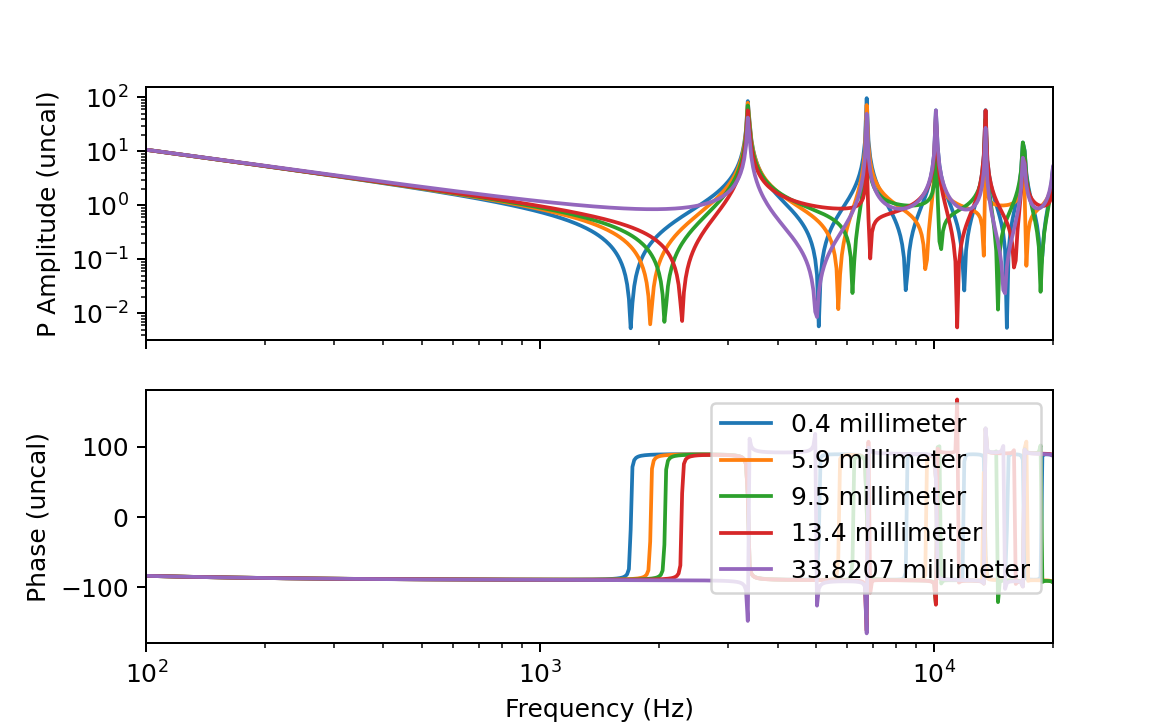

In [19]:
tube_model = model.StraightTube(L=(17.5 + 33.4207) * units.mm, P0=1, PL=0, R0=0.99, RL=0.99)
widget_f = tube_model.widget_frequency(
    np.logspace(np.log10(100), np.log10(20000), 512) * units.Hz,
    # np.array([tube_model.L.magnitude / 2]) * units.mm,  # Used to verify P0 and PL are symmetrical
    np.array([0.4, 5.9, 9.5, 13.4, 33.8207]) * units.mm,
    val='p', fig_num=1, figkwargs={"figsize": (6.5, 6.5/1.618034), 'dpi': 180})
widget_f